In [1]:
import keypoint_moseq as kpms
import numpy as np
import os, shutil
# import joblib

In [56]:
project_dir = r'R:\PBS\LiPatel_Labs\General\SLEAP\kpms\valen'
config = lambda: kpms.load_config(project_dir)

In [58]:
sleap_file = project_dir + '\H5\Box1-20240121T092257-102257.h5'
kpms.setup_project(project_dir,sleap_file = sleap_file,overwrite=True)

In [59]:
kpms.update_config(
    project_dir,
    video_dir = project_dir + '/videos/',
    anterior_bodyparts=['nose'], posterior_bodyparts=['tailbase'], 
    use_bodyparts = ['nose',  'l_ear',  'r_ear', 
                     'neck', 'body',  'tailbase', 'l_front', 
                     'r_front', 'r_rear', 'l_rear'])
                     

In [60]:
#keypoint_data_path = '/nadata/snlkt/data/Caroline/1.SocialPain/7.AllALPHACLASS_SLEAP/Formalin_kpms/raw_data/h5/'
keypoint_data_path = project_dir + '/H5/'
coordinates,confidences,bodyparts = kpms.load_keypoints(keypoint_data_path,'sleap')

data,metadata = kpms.format_data(coordinates,confidences, **config())

Loading keypoints: 100%|██████████████████| 3/3 [00:00<00:00,  5.84it/s]


>=90.0% of variance exlained by 10 components.


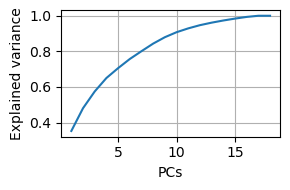

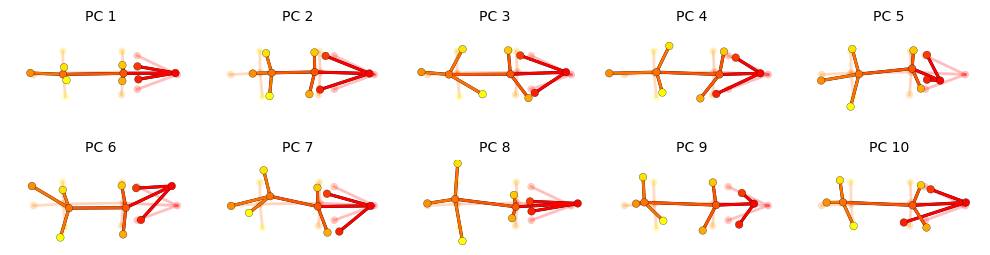

In [62]:
pca = kpms.fit_pca(**data, **config())
kpms.save_pca(pca, project_dir)
kpms.print_dims_to_explain_variance(pca, 0.9)
kpms.plot_scree(pca, project_dir=project_dir)
kpms.plot_pcs(pca, project_dir=project_dir, **config())

In [63]:
kpms.update_config(project_dir, latent_dim=10)

In [65]:
model = kpms.init_model(data, pca=pca, **config())


Outputs will be saved to
R:\PBS\LiPatel_Labs\General\SLEAP\kpms\valen\2024_06_04-17_07_03


 49%|█████████████████▏                 | 25/51 [06:40<07:20, 16.93s/it]

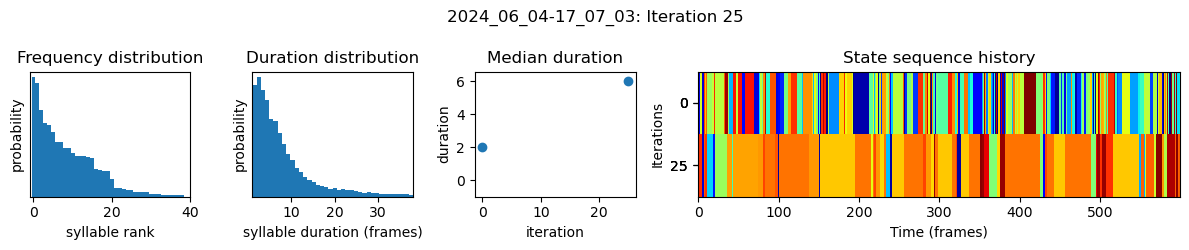

 98%|██████████████████████████████████▎| 50/51 [11:18<00:09,  9.34s/it]

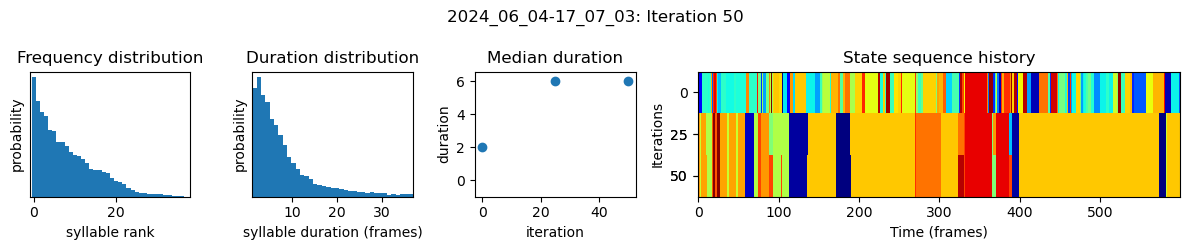

100%|███████████████████████████████████| 51/51 [11:29<00:00, 13.53s/it]


In [66]:
num_ar_iters = 50

model, model_name = kpms.fit_model(
    model, data, metadata, project_dir,
    ar_only=True, num_iters=num_ar_iters)

Outputs will be saved to
R:\PBS\LiPatel_Labs\General\SLEAP\kpms\valen\2024_06_04-17_07_03


  5%|█▋                                | 25/501 [01:48<32:57,  4.15s/it]

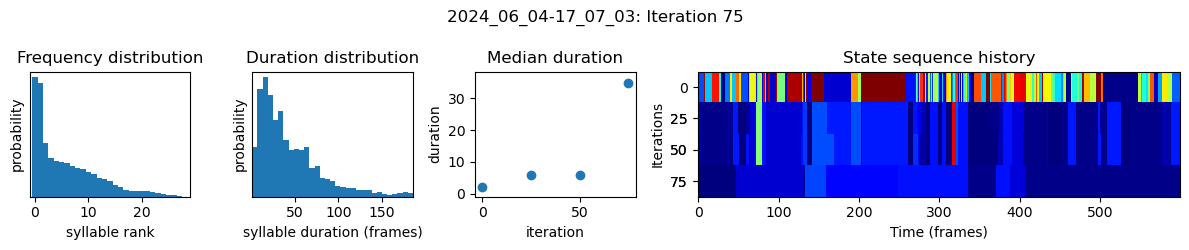

 10%|███▍                              | 50/501 [03:33<31:10,  4.15s/it]

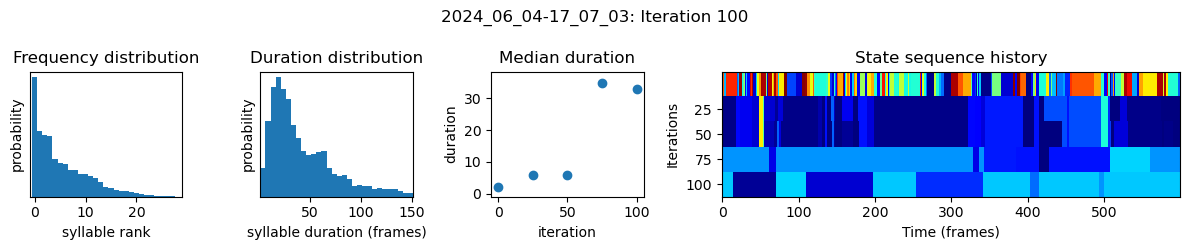

 15%|█████                             | 75/501 [05:18<29:24,  4.14s/it]

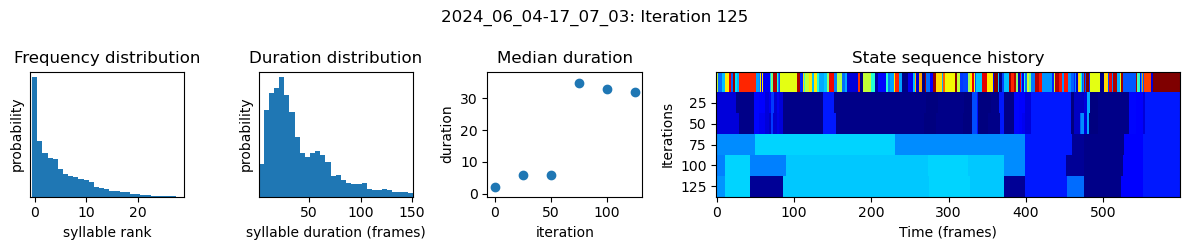

 20%|██████▌                          | 100/501 [07:04<27:58,  4.18s/it]

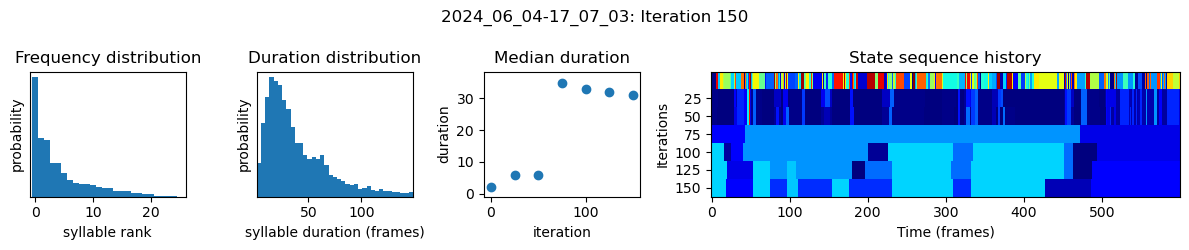

 25%|████████▏                        | 125/501 [08:50<25:52,  4.13s/it]

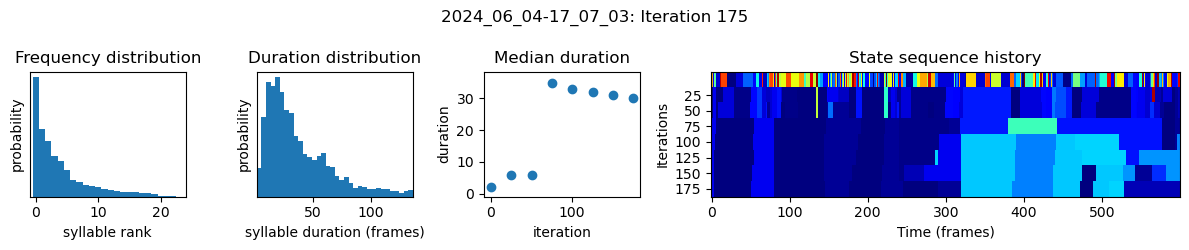

 30%|█████████▉                       | 150/501 [10:35<24:25,  4.17s/it]

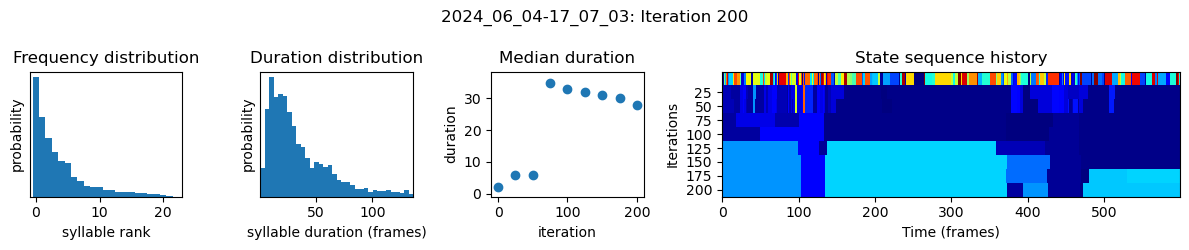

 35%|███████████▌                     | 175/501 [12:21<23:02,  4.24s/it]

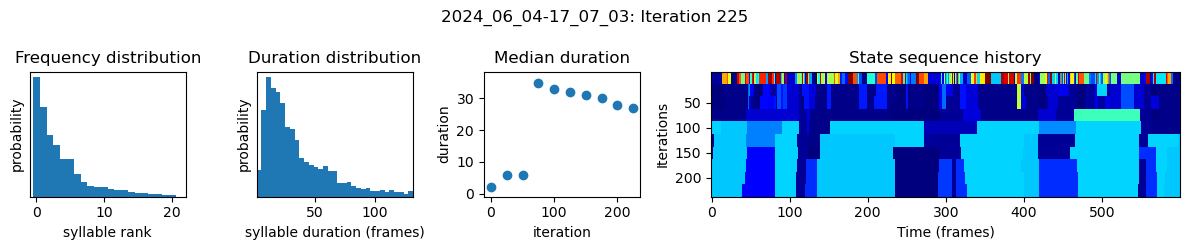

 40%|█████████████▏                   | 200/501 [14:06<20:48,  4.15s/it]

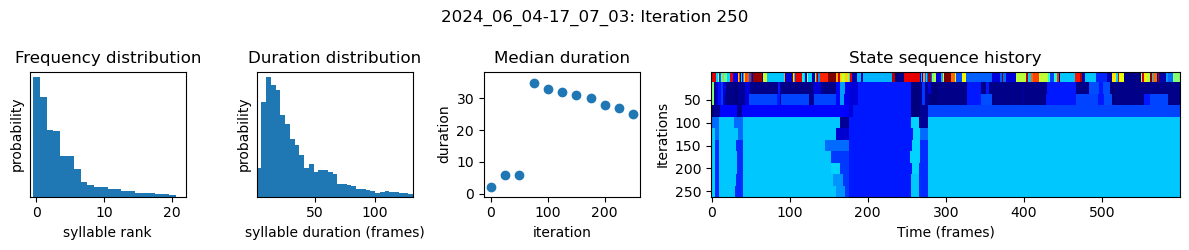

 45%|██████████████▊                  | 225/501 [15:51<18:57,  4.12s/it]

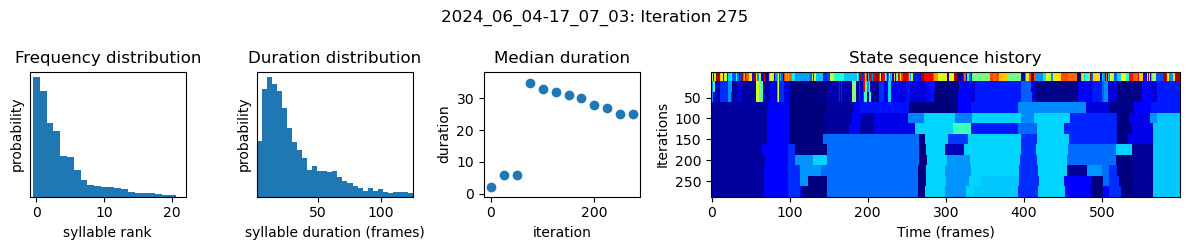

 50%|████████████████▍                | 250/501 [17:36<17:27,  4.17s/it]

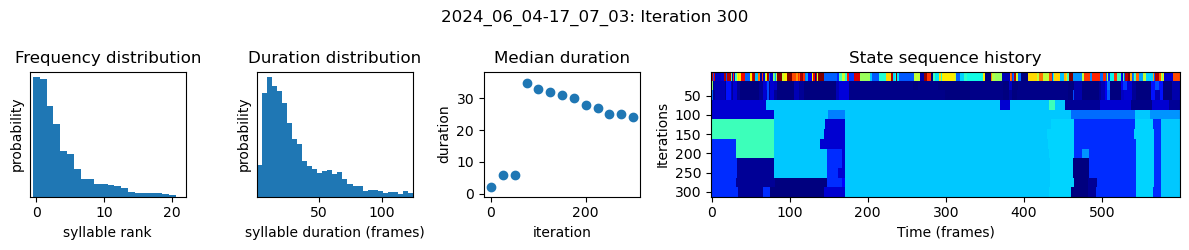

 55%|██████████████████               | 275/501 [19:22<15:45,  4.18s/it]

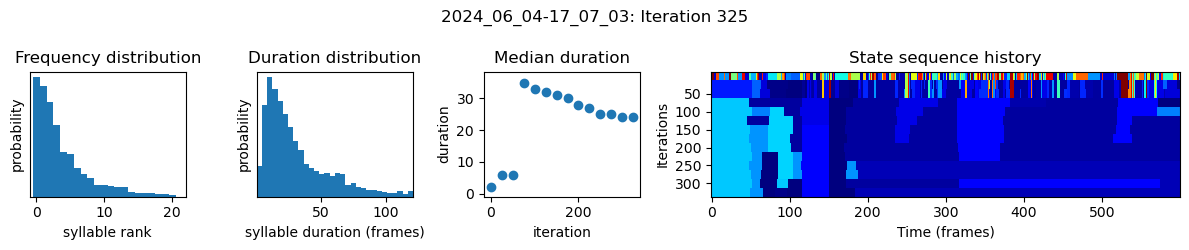

 60%|███████████████████▊             | 300/501 [21:08<13:55,  4.16s/it]

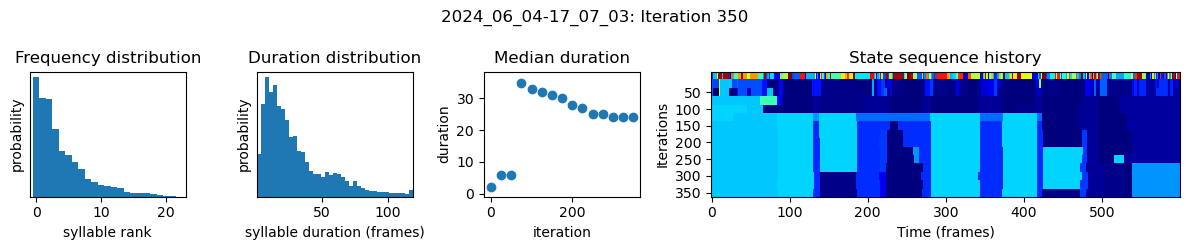

 65%|█████████████████████▍           | 325/501 [22:54<12:07,  4.13s/it]

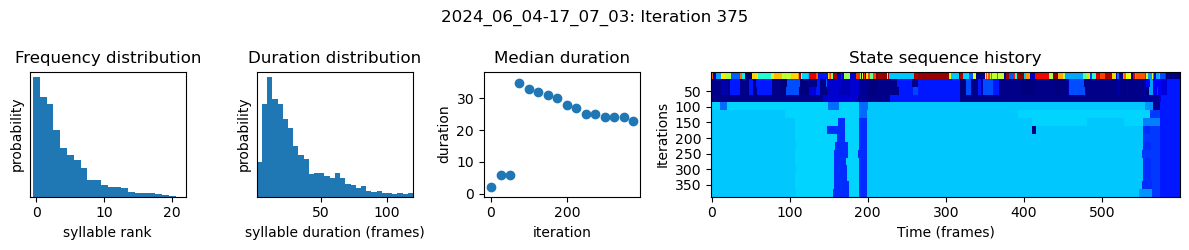

 70%|███████████████████████          | 350/501 [24:40<10:39,  4.23s/it]

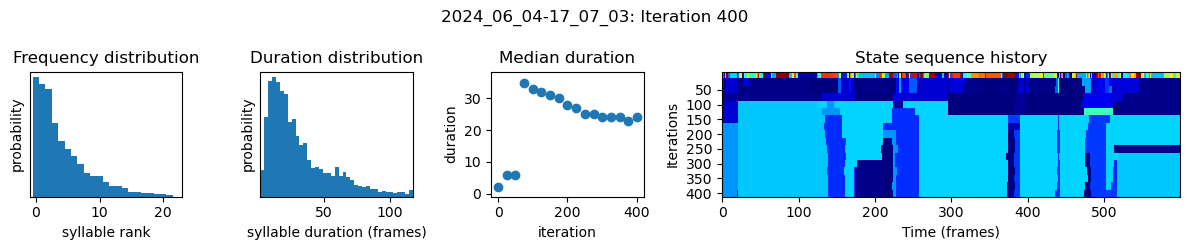

 75%|████████████████████████▋        | 375/501 [26:26<08:47,  4.19s/it]

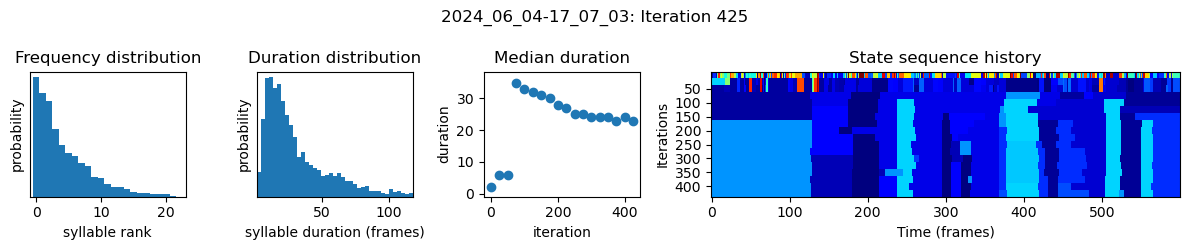

 80%|██████████████████████████▎      | 400/501 [28:11<07:00,  4.16s/it]

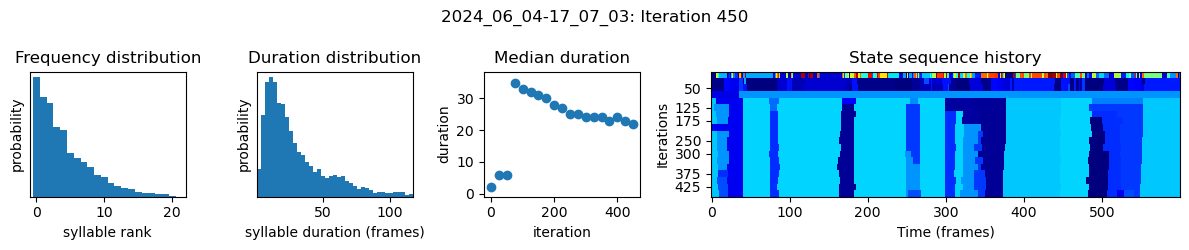

 85%|███████████████████████████▉     | 425/501 [29:57<05:17,  4.18s/it]

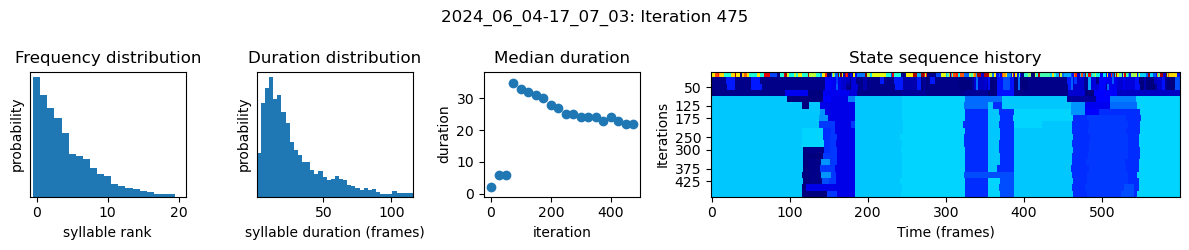

 90%|█████████████████████████████▋   | 450/501 [31:43<03:34,  4.21s/it]

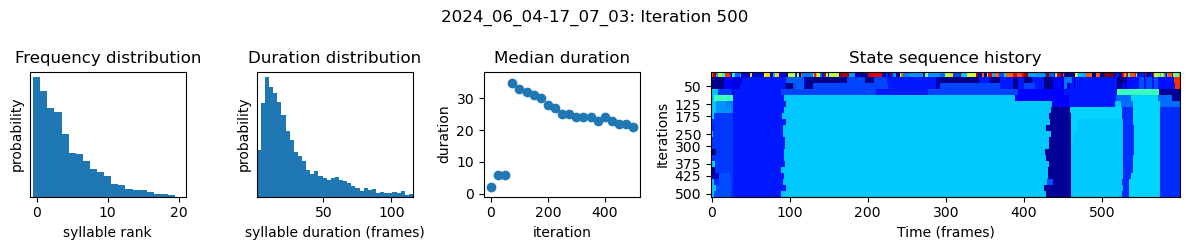

 95%|███████████████████████████████▎ | 475/501 [33:35<01:51,  4.29s/it]

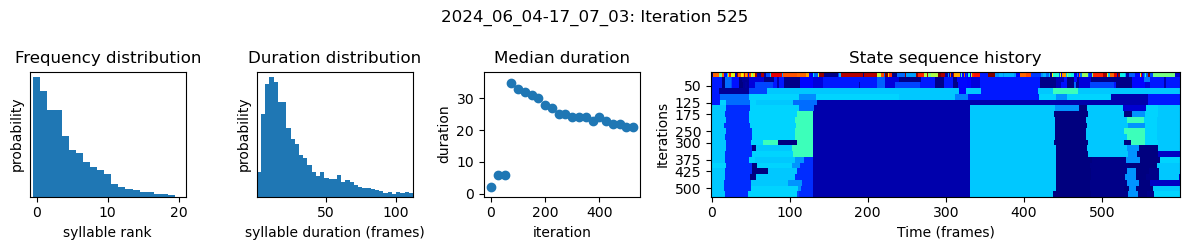

100%|████████████████████████████████▉| 500/501 [35:23<00:04,  4.26s/it]

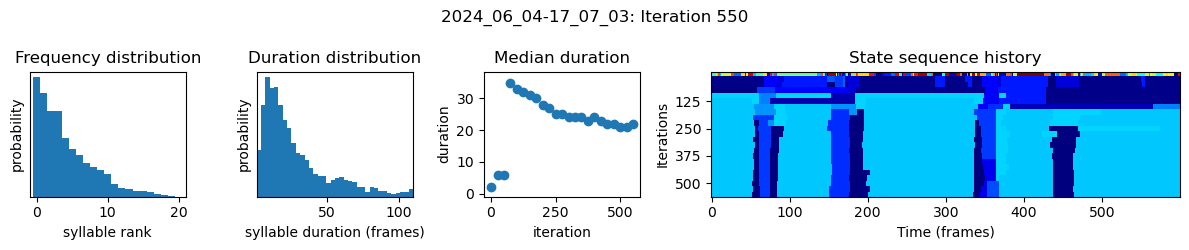

100%|█████████████████████████████████| 501/501 [35:28<00:00,  4.25s/it]


In [73]:
# load model checkpoint
model, data, metadata, current_iter = kpms.load_checkpoint(
    project_dir, model_name, iteration=num_ar_iters)

# modify kappa to maintain the desired syllable time-scale
model = kpms.update_hypparams(model, kappa=10e15)

# run fitting for an additional 200 iters
model = kpms.fit_model(
    model, data, metadata, project_dir, model_name, ar_only=False, 
    start_iter=current_iter, num_iters=current_iter+500)[0]
    

In [74]:
kpms.reindex_syllables_in_checkpoint(project_dir, model_name);


Reindexing: 100%|███████████| 23/23 [00:26<00:00,  1.16s/model snapshot]


In [75]:
model, data, metadata, current_iter = kpms.load_checkpoint(project_dir, model_name)

# extract results
results = kpms.extract_results(model, metadata, project_dir, model_name)

Saved results to R:\PBS\LiPatel_Labs\General\SLEAP\kpms\valen\2024_06_
04-17_07_03\results.h5


In [76]:
# optionally save results as csv
kpms.save_results_as_csv(results, project_dir, model_name)

Saving to csv: 100%|██████████████████████| 3/3 [00:03<00:00,  1.17s/it]


Saving trajectory plots to R:\PBS\LiPatel_Labs\General\SLEAP\kpms\valen\2024_06_04-17_07_03\trajectory_plots


Generating trajectory plots: 100%|██████| 14/14 [00:03<00:00,  3.84it/s]


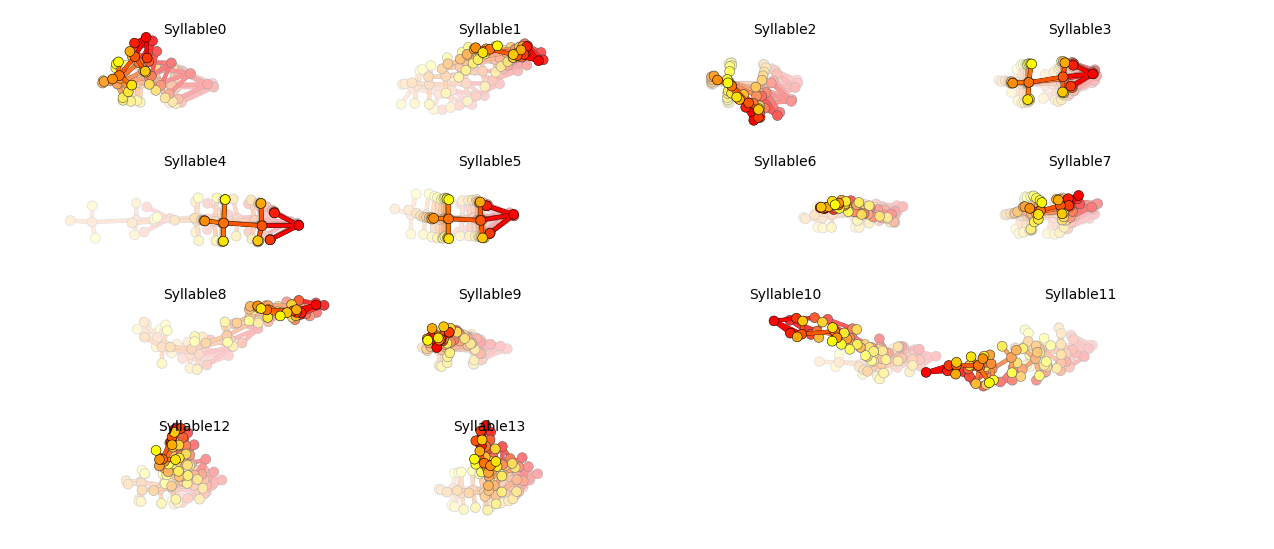

In [77]:
results = kpms.load_results(project_dir, model_name)
kpms.generate_trajectory_plots(coordinates, results, project_dir, model_name, **config())

In [78]:
# optionally make movies
kpms.generate_grid_movies(results, project_dir, model_name, coordinates=coordinates, **config());

Writing grid movies to R:\PBS\LiPatel_Labs\General\SLEAP\kpms\valen\2024_06_04-17_07_03\grid_movies


C:\Users\Lihao\anaconda3\envs\keypoint_moseq\lib\site-packages\keypoint_moseq\viz.py:1266: UserWarning:


Videos will be downscaled by a factor of 0.45 so that the grid movies
are under 1920 pixels. Use `max_video_size` to increase or decrease
this size limit.





Using window size of 704 pixels


Generating grid movies: 100%|███████████| 17/17 [01:41<00:00,  5.96s/it]
